In [1]:
import pandas as pd
import numpy as np

# Data for final consumption and total output

We apply our models to the input-output data of Germany. The data
we use for initial output and final consumption per industry, as well as the supply and
demand shock data is taken from:

Pichler, A. and Farmer, J. D. (2021b). Simultaneous supply and demand constraints in
input–output networks: the case of covid-19 in Germany, Italy and Spain (Version V1).
Zenodo. https://doi.org/10.5281/zenodo.4326815

## Final consumption

In [2]:
fdata = pd.read_csv('fdata_ita.csv', sep = ',')
fdata = fdata.iloc[:54,:] #leaving out T: Household activities
f = fdata['f'].astype('float')
fdata.head()

,Unnamed: 0,f,fmin,fmax,f.maxF,f.maxX
0,A01,23713.831192,0,21345.327192,2.134533e+04,21345.327192
1,A02,1287.390162,0,1238.167593,7.089618e-11,0.000000
2,A03,1144.893223,0,1030.403900,1.030404e+03,1030.403900
3,B,9853.060356,0,8868.240274,6.504931e+03,6504.930858
4,C10-C12,94671.008208,0,85212.776296,3.342065e+04,33420.652971


In [3]:
fmax = fdata.iloc[:,3]
f_initial = fdata.iloc[:,1]

shock = np.zeros(fmax.shape[0])
for i in range (0,fmax.shape[0]):
    shock[i] = round(1- fmax[i]/f_initial[i],3)
    
print(shock) # ok! 

[0.1   0.038 0.1   0.1   0.1   0.1   0.099 0.1   0.1   0.1   0.1   0.098
 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.012
 0.006 0.017 0.099 0.1   0.099 0.098 0.552 0.473 0.473 0.335 0.034 0.791
 0.04  0.035 0.03  0.085 0.016 0.011 0.049 0.005 0.052 0.084 0.098 0.092
 0.05  0.049 0.    0.    0.001 0.047]


In [4]:
fmax = fdata.loc[:,fdata.columns.str.contains('fmax')]
fmax = fmax.iloc[:54,:].astype('float') #leaving out T
fmax = np.array(fmax)
fmax.shape

f_max = np.zeros(fmax.shape[0])
for i in range (fmax.shape[0]):
    f_max[i] = fmax[i][0]

## Total output

In [5]:
xdata =  pd.read_csv('xdata_ita.csv', sep = ',')
xdata = xdata.iloc[:54,:] #leaving out T
x = xdata['x'].astype('float')
xdata.head()   # de x-waarden zijn af te lezen in de WIOD laatste kolom

,Unnamed: 0,x,xmin,xmax,x.maxF,x.maxX
0,A01,71272.896677,0,71272.896677,42676.136170,42676.136170
1,A02,1980.006416,0,297.003455,297.003455,297.003455
2,A03,2170.824508,0,2170.824508,1471.152936,1471.152936
3,B,13515.229050,0,8850.508371,8850.508371,8850.508371
4,C10-C12,168846.903150,0,125008.417700,64382.508727,64382.508727


In [6]:
xmax = xdata.iloc[:,3]
x_initial = xdata.iloc[:,1]

shock = np.zeros(xmax.shape[0])
for i in range (0,fmax.shape[0]):
    shock[i] = round(1- xmax[i]/x_initial[i],6)
    
print(shock) # ok! 

[0.       0.849999 0.       0.345146 0.259635 0.593935 0.60647  0.48664
 0.       0.       0.082258 0.       0.472389 0.61387  0.726353 0.662572
 0.387682 0.504511 0.469949 0.696668 0.597033 0.580317 0.339612 0.
 0.       0.       0.49612  0.13656  0.334664 0.251624 0.       0.
 0.       0.       0.       0.56561  0.       0.       0.       0.
 0.       0.       0.       0.512768 0.       0.       0.       0.396788
 0.       0.416264 0.       0.       0.       0.492191]


In [7]:
xmax = xdata.loc[:,xdata.columns.str.contains('xmax')]
xmax = xmax.iloc[:54,:].astype('float') #leaving out T
xmax = np.array(xmax)
x_max = np.zeros(xmax.shape[0])
for i in range (xmax.shape[0]):
    x_max[i] = xmax[i][0]
x_max.shape

(54,)

# IO table 

In [8]:
df = pd.read_csv('ita_wiot.csv',sep = ',',low_memory=False)
df.head()

,Unnamed: 0,A01,A02,A03,B,C10-C12,C13-C15,C16,C17,C18,...,M71,M72,M73,M74_M75,N,O84,P85,Q,R_S,T
0,A01,0.097939,0.000113,0.001136,0.000567,0.181394,0.007495,0.002370,0.002256,8.609811e-04,...,0.000240,2.329589e-03,0.000298,5.629345e-04,0.005179,0.000612,0.000347,5.671440e-04,0.001305,0
1,A02,0.000000,0.006829,0.000425,0.000012,0.001058,0.000002,0.007682,0.002543,1.702069e-04,...,0.000034,9.502826e-07,0.000081,3.402062e-05,0.000777,0.000000,0.000000,4.429787e-08,0.000175,0
2,A03,0.000000,0.000031,0.011247,0.000000,0.000476,0.000003,0.000000,0.000000,7.126055e-07,...,0.000003,5.729112e-06,0.000006,7.411210e-07,0.000012,0.000054,0.000061,8.677816e-05,0.000281,0
3,B,0.000122,0.000017,0.000103,0.001477,0.000432,0.000359,0.000326,0.000678,5.043343e-04,...,0.001273,1.384237e-03,0.001033,8.018579e-04,0.000879,0.000136,0.000258,4.759545e-04,0.000395,0
4,C10-C12,0.073600,0.000149,0.043837,0.001451,0.225659,0.010460,0.000780,0.003053,8.387346e-04,...,0.001015,1.784083e-03,0.002589,1.158860e-03,0.001811,0.000382,0.000445,2.781864e-03,0.003419,0


In [9]:
df = df.iloc[0:54,1:55]# leaving out industries U and T
df = df.astype('float')
df.shape

(54, 54)

**Creating matrix A**

In [10]:
A = np.array(df)
N = A.shape[0]
A.shape

(54, 54)

In [11]:
x_0 = np.array(x)

In [12]:
f_0 = np.array(f)

# Leontief Model

**Calculating equilibrium when x is given**

In [13]:
final_consumption = np.matmul(np.identity(N)-A, x_0)
sum(f_max)/sum(final_consumption)

0.8892972310380289

**Computing equilibrium when f is given**

In [14]:
L = np.linalg.inv(np.identity(N)-A)

In [48]:
total_output = np.matmul(L, f_0)
sum(x_max)/sum(x_0)

0.7239074861717804

# Optimalization

In [16]:
from scipy.optimize import linprog

### Feasible Market Allocations
Given exogenous constraints to supply and demand, what is the feasible market allocation that maximizes final consumption and/or total output? The solution needs to lie within exogenous bounds on supply and demand and also needs to satisfy the assumption of Leontief production:

$$ x = Ax + f = Lf $$

We seek market allocations {$x^*$ , $f^*$} that (a) respect the given production recipes $x^*=Lf^*$ and (b) satisfy basic output and demand constraints $x^* \in [0, x^{max}]$ and $f^* \in [0, f^{max}]$.

**Optimization procedure**

As a first case, we determine the market allocation that maximizes gross output under the assumptions specified. Large levels of output indicate high levels of ecomomic activity, which in turn entail high levels of primary factors such as labor compensation. As a second case, we look at market allocations that maximize final comsumption given current production capacities. Due to the linearity of the Leontief framework, the problem boils down to linear programming exercises.

*Maximizing gross output*
$$ \text{max}_f \qquad 1^T(I-A)^{-1}f $$
$$ \text{Subject to} \quad (I-A)^{-1}f \in [0, x^{max}] $$

*Maximizing final consumption*
$$ \text{max}_x \qquad 1^T(I-A)x $$
$$ \text{Subject to} \quad (I-A)x \in [0, f^{max}] $$

### Maximizing total output

In [17]:
z = np.ones(N)
z.shape

(54,)

In [18]:
obj = -np.matmul(np.matrix.transpose(z), L)
lhs_ineq = np.linalg.inv(np.identity(N)-A)
rhs_ineq = xmax

In [19]:
l = fmax.shape[0]
bnd = []
for i in range (0,l):
    bnd.append((0,fmax[i][0]))

In [20]:
result = linprog(c = obj, A_ub= lhs_ineq, b_ub= rhs_ineq, bounds = bnd)

In [21]:
optimal_f = np.ones(N)
for i in range(0,N):
    optimal_f[i] = result.x[i]

In [22]:
optimal_output = np.matmul(np.matmul(np.matrix.transpose(z), L), optimal_f)
optimal_output

2474009.566507431

In [23]:
optimal_output/sum(x_0)

0.6108960764159767

In [24]:
sum(optimal_f)/sum(f_0)
#sum(newf)/sum(final_consumption)

0.6359504250804172

In [49]:
Max_output = (optimal_output/sum(x_0), sum(optimal_f)/sum(f_0))
Max_output

(0.6108960764159767, 0.6359504250804172)

### Maximizing final consumption

In [26]:
obj2 = -np.matmul(np.matrix.transpose(z), np.identity(N)-A)
lhs_ineq2 = np.identity(N)-A
rhs_ineq2 = fmax

In [27]:
l = xmax.shape[0]
bnd2 = []
for i in range (0,l):
    bnd2.append((0,xmax[i][0]))

In [28]:
result2 = linprog(c = obj2, A_ub= lhs_ineq2, b_ub= rhs_ineq2, bounds = bnd2)

In [29]:
optimal_output_2 = np.ones(l)
for i in range(0,l):
    optimal_output_2[i] = result2.x[i]

In [30]:
optimal_f_2 = np.matmul(np.matmul(np.matrix.transpose(z), np.identity(N)-A ), optimal_output_2)

In [31]:
sum(optimal_output_2)/sum(x_0)

0.6349813305863702

In [32]:
optimal_f_2/sum(f_0)

0.6526937179118759

In [50]:
Max_consumption = (sum(optimal_output_2)/sum(x_0),optimal_f_2/sum(f_0))
Max_consumption

(0.6349813305863702, 0.6526937179118759)

**Note that both optimization problems give almost the same solution**

# Rationing

### Input bottlenecks and rationing variations
In contrast to the optimization methods, this represents a bottom-up approach for finding feasible market allocations. Industries place orders to their suppliers based on incoming demand. Since suppliers can be output constrained, they might not be able to satisfy demand fully. A supplier therefore needs to make a decision about how much of each customer’s demand it serves. Intermediate consumers transform inputs to outputs based on fixed production recipes. Thus if a customer receives less inputs than she asked for, she faces an input bottleneck further constraining her production. As a consequence, the customer reduces her demand for other inputs as they are not further needed under limited productive capacities. We iterate this procedure forward until the algorithm converges.

**Strict Proportional Rationing**

If industries are unable to satisfy total incoming demand completely, they distribute output proportional to their customers’ demand, where no distinction is made between intermediate and final customers. We implement the rationing algorithm in the following way:
1. Industries determine their total demand as if there were no supply-side constraints, $d = Lf^{\text{max}}$;
2. Industries evaluate if they are able to satisfy demand goven their constrained production capacities;
3. Industries that only partially satisfy demand, create a bottleneck;
4. Industries reduce their production according to the largest input bottleneck (assumption of fixed recipes);
5. The total amount of goods delivered to the final consumer is computed;
6. Iterate 1-5 until there are no input constraints left.

Formulas:

$$ r_i[t] = \frac{x_i^{\text{max}}}{d_i[t]} $$

$$ s_i[t] = min_j \{r_j[t], 1\} $$

$$ x_i[t] = \text{min}\{x_i^{\text{max}}, s_i[t]d_i[t]\} $$

$$ f_i[t] = \text{max} \Big\{ x_i[t] - \sum_{i} a_{ij} x_j[t], 0 \Big\}$$

$$ d_i[t+1] = \sum_{j} l_{ij} f_j[t] $$

The algorithm converges to a new feasible economic allocation if $d_i[t+1] = d_i[t]$ for all i.

*Implementation*

In [34]:
def algo_proportional(A, L, fmax, xmax, prioritize="no"):
    x = [0]
    fvec = [] #initial demand vector
    fvec.append(fmax)
    r = [0] # output constraints
    s = [0] # input bottlenecks 
    output_constraints = [1] 
    d = [0] # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]

    #print('Aggregated Demand:         {}'.format(d[1]))
    t=1
    epsilon = 1e-6
    while not np.all(abs(d[t] - d[t-1]) < epsilon):
        print('\nIteration {0}'.format(t))
        print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        r.append(np.ones(len(xmax)))
        s.append(np.ones(len(xmax)))
        fvec.append(np.ones(len(xmax)))
        x.append(np.ones(len(xmax)))
        d.append(np.ones(len(xmax)))
        for i in range (0,len(x_max)):
            r[t][i] = x_max[i]/d[t][i]
            #print('Output constraints:         {}'.format(r[t]))
        for i in range(0,len(x_max)):
            for j in range(0,len(x_max)):
                if A[j][i] > 0:
                    output_constraints.append(r[t][j])
            s[t][i] = min(output_constraints)
            output_constraints = [1]
        print('Input bottlenecks:         {}'.format(s[t]))
        for i in range(0,len(xmax)):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
        # print('Constrained production:    {}'.format(x[t]))
        for i in range(0,len(xmax)):
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],x[t]),0)
        # print('Constrained delivery:      {}'.format(f[t]))
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
        t=t+1
        #print('Aggregated Demand:         {}'.format(d[t]))
    return sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0)


In [35]:
result_proportional = algo_proportional(A, L, f_max, x_max, prioritize="no")
result_proportional


Iteration 1
---------
Input bottlenecks:         [0.30540743 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652
 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652
 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652
 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652
 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652
 0.16162652 0.16162652 0.30540743 0.16162652 0.16162652 0.16162652
 0.16162652 0.16162652 0.30540743 0.16162652 0.30540743 0.30540743
 0.30540743 0.16162652 0.16162652 0.16162652 0.16162652 0.16162652
 0.16162652 0.16162652 0.30540743 0.30540743 0.16162652 0.16162652]

Iteration 2
---------
Input bottlenecks:         [1.         0.99988502 0.99988502 0.99988502 0.99988502 0.99988502
 0.99988502 0.99988502 0.99988502 0.99988502 0.99988502 0.99988502
 0.99988502 0.99988502 0.99988502 0.99988502 0.99988502 0.99988502
 0.99988502 0.99988502 0.99988502 0.99988502 0.99988502 0.99988502
 0.99988502 0.99988502 0.999

(0.16225463865054215, 0.1687630239228383)

## Mixed priority/proportional rationing

We implement the rationing algorithm in the following way:
1. Industries determine their total demand as if there were no supply-side constraints, $d = Lf^{\text{max}}$;
2. Industries evaluate if they are able to satisfy demand given their constrained production capacities;
3. Industries that only partially satisfy demand, create a bottleneck;
4. Industries reduce their production according to the largest input bottleneck (assumption of fixed recipes);
5. The total amount of goods delivered to the final consumer is computed;
6. Iterate 1-5 until there are no input constraints left.

Formulas:

$$ r_i[t] = \frac{x_i^{\text{max}}}{\sum_{j}A_{ij}d_j[t]} $$

$$ s_i[t] = min_j \{r_j[t], 1\} $$

$$ x_i[t] = \text{min}\{x_i^{\text{max}}, s_i[t]d_i[t]\} $$

$$ f_i[t] = \text{max} \Big\{ x_i[t] - \sum_{i} a_{ij} x_j[t], 0 \Big\}$$

$$ d_i[t+1] = \sum_{j} l_{ij} f_j[t] $$

The algorithm converges to a new feasible economic allocation if $d_i[t+1] = d_i[t]$ for all i.

*Implementation*

In [36]:
def algo_mixed(A, L, fmax, xmax, prioritize="yes"):
    x = [0]
    demand = [] #initial demand vector
    demand.append(fmax)
    r = [0] # output constraints
    s = [0] # input bottlenecks 
    output_constraints = [1] 
    d = [0] # aggregated demand vector 
    d.append(np.matmul(L, demand[0])) #d[1] = L*f[0]

    #print('Aggregated Demand:         {}'.format(d[1]))
    t=1
    epsilon = 1e-6
    while not np.all(abs(d[t] - d[t-1]) < epsilon):
        print('\nIteration {0}'.format(t))
        print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        r.append(np.ones(len(xmax)))
        s.append(np.ones(len(xmax)))
        demand.append(np.ones(len(xmax)))
        x.append(np.ones(len(xmax)))
        d.append(np.ones(len(xmax)))
        for i in range (0,len(x_max)):
            r[t][i] = xmax[i]/np.matmul(A[i],d[t])
            #print('Output constraints:         {}'.format(r[t]))
        for i in range(0,len(x_max)):
            for j in range(0,len(x_max)):
                if A[j][i] > 0:
                    output_constraints.append(r[t][j])
            s[t][i] = min(output_constraints)
            output_constraints = [1]
        print('Input bottlenecks:         {}'.format(s[t]))
        for i in range(0,len(xmax)):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
        # print('Constrained production:    {}'.format(x[t]))
        for i in range(0,len(xmax)):
            demand[t][i] = max(x[t][i] - np.matmul(A[i],x[t]),0)
        # print('Constrained delivery:      {}'.format(f[t]))
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],demand[t])
        t=t+1
        #print('Aggregated Demand:         {}'.format(d[t]))
    return sum(x[t-1])/sum(x_0), sum(demand[t-1])/sum(f_0)

In [37]:
result_mixed = algo_mixed(A, L, f_max, x_max, prioritize="yes")
result_mixed


Iteration 1
---------
Input bottlenecks:         [0.54621391 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179
 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179
 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179
 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179
 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179
 0.49548179 0.49548179 0.54621391 0.49548179 0.49548179 0.49548179
 0.49548179 0.49548179 0.54621391 0.49548179 0.54621391 0.54621391
 0.54621391 0.49548179 0.49548179 0.49548179 0.49548179 0.49548179
 0.49548179 0.49548179 0.54621391 0.54621391 0.49548179 0.49548179]

Iteration 2
---------
Input bottlenecks:         [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


(0.4326791328395896, 0.4412252521612323)

## Priority rationing

Largest first rationing; firms are prioritized over the final consumer. Take
an initial demand vector $f[0] = f$
max as given, implying an initial aggregate demand vector
$d[1] = Lf[0]$. Every firm $i$ ranks each customers based on initial demand size. Let  $h_{ij}$ be the $j$ largest customers of firm $i$: $h_{ij} =
\{k(1), k(2), ..., k(j)
: A_{ik(1)}d_{k(1)} [1] ≥ A_{ik(2)}d_{k(2)} [1] ≥ ... ≥ A_{ik(j)}
d_{k(j)}[1] \}$. By looping over the
index $t = {1, 2, ...}$, the following system is iterated forward:

Formulas:

$$ r_{ij}[t] = \frac{x_i^{\text{max}}}{\sum_{n\in h_{ij}}A_{ih(j)}d_{n_{(j)}}[t]} $$

$$ s_i[t] = min_j \{r_{ji}[t], 1\} $$

$$ x_i[t] = \text{min}\{x_i^{\text{max}}, s_i[t]d_i[t]\} $$

$$ f_i[t] = \text{max} \Big\{ x_i[t] - \sum_{i} a_{ij} x_j[t], 0 \Big\}$$

$$ d_i[t+1] = \sum_{j} l_{ij} f_j[t] $$

The algorithm converges to a new feasible economic allocation if $d_i[t+1] = d_i[t]$ for all i.

In [38]:
d = np.matmul(L, f_max)
list_1 = []   #lijst die we gaan sorteren van groot naar klein
list_2 = []   #lijst die niet gesorteerd wordt om oorspronkelijke indices terug te vinden
for i in range(A.shape[0]):
    list_1.append([])
    list_2.append([])
for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        list_1[i].append(A[i][j]*d[j])     # list_1[i][j] = list_2[i][j] = A[i][j]*d[j]
        list_2[i].append(A[i][j]*d[j])
    list_1[i].sort(reverse = True)              #list_1 sorteren van groot naar klein: A[i][j]*d[j] >= A[i][j+1]*d[j+1]

names_ordered=[]
for i in range(A.shape[0]):
    names_ordered.append([])
    
for i in range(A.shape[0]):
    for k in list_1[i]:                 # we willen nu de indices van de j+1 (j van 0 tot en met N-1) grootste suppliers  
            for l in range(A.shape[0]):   #van firm i. Hiervoor gebruiken we de ongesorteerde lijst (list_2)
                if list_2[i][l] == k:
                    names_ordered[i].append(l)    

In [39]:
def algo_priority(A, L, fmax, xmax, ordered, prioritize="yes"):    
    x = [0]
    fvec = [] #initial demand vector
    fvec.append(fmax)
    rvec = [0] # output constraints
    s = [0] # input bottlenecks 
    output_constraints = [1] 
    d = [0] # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]
    som = 0
    #print('Aggregated Demand:         {}'.format(d[1]))
    t=1
    epsilon = 1e-6
    
    while not np.all(abs(d[t] - d[t-1]) < epsilon):
        #print('\nIteration {0}'.format(t))
        #print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        rvec.append([np.zeros(N)])
        s.append(np.ones(N))
        fvec.append(np.ones(N))
        x.append(np.ones(N))
        d.append(np.ones(N))
        demand = np.identity(N)
        for i in range(0,N):
            for j in range(0,N):
                for k in ordered[i][:j+1]:
                    som = som + A[i][k]*d[t][k] 
                demand[i][j] = som   #demand[i][j] = demand of j'th biggest customers of firm i summed up
                som = 0
        remainder = np.identity(N)
    
        for i in range(0,N):
            for j in range(0,N):
                remainder[i][j] = x_max[i] - demand[i][j]
                
        ####################################################
        ####################### rvec #######################
        ####################################################
        for i in range(0,N):
            rvec[t].append([])
        for i in range(0,N):
            if all(remainder[i][j]>0 for j in range(0,N)):
                rvec[t][i] = np.ones(N) 
            elif all(remainder[i][j]<=0 for j in range(0,N)): 
                rvec[t][i] = np.zeros(N)
                for k in ordered[i][:1]: 
                    rvec[t][i][k] = x_max[i]/demand[i][0]
        
            else: 
                idx = np.where(remainder[i]<=0) # index for partially met demand
                idx_fully = np.where(remainder[i]>0) 
                length = len(idx_fully[0])
                rvec[t][i] = np.zeros(N)
                for l in range(0,length-1):
                    index = ordered[i][l]
                    rvec[t][i][index] = 1
                m = ordered[i][length-1]
                rvec[t][i][m] = remainder[i][length-1]/(demand[i][length]-demand[i][length-1])
                
        #####################################################
        ################# Input bottlenecks #################
        #####################################################
        for i in range(0,N):
            for j in range(0,N):
                if A[j][i]>0:
                    output_constraints.append(rvec[t][j][i])
            s[t][i] = min(output_constraints)
            output_constraints = [1]   
        #print('Input bottlenecks:         {}'.format(s[t]))
        
        ######################################################
        ############### Constrained Production ###############
        ######################################################
        for i in range(0,N):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
            
        ######################################################
        ################ Constrained Delivery ################
        ######################################################
        for i in range(0,len(xmax)):
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],x[t]),0)
        
        ######################################################
        ################ Aggregated demand ###################
        ######################################################
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
            
        t=t+1
    return sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0)

In [40]:
result_priority = algo_priority(A, L, f_max, x_max, names_ordered, prioritize="yes")

## Random rationing

In [41]:
from random import randrange

In [42]:
x = []
y = []
while len(x)<300:
    random_ordered=[]
    for i in range(N):
        random_ordered.append([])
    
    for i in range(N):
        while len(random_ordered[i])<N:
            random = randrange(N)
            while random in random_ordered[i]:
                random = randrange(N)# we willen nu de indices van de j+1 (j van 0 tot en met N-1) grootste suppliers  
            random_ordered[i].append(random)

    result_x = algo_priority(A, L, f_max, x_max, random_ordered, prioritize="yes")[0]
    result_y = algo_priority(A, L, f_max, x_max, random_ordered, prioritize="yes")[1]
    x.append(result_x)
    y.append(result_y)
result_random = (sum(x)/len(x), sum(y)/len(y))
print(sum(x)/len(x))
print(sum(y)/len(y))

0.035703002840360286
0.03812085596095176


In [43]:
result_random[0]

0.035703002840360286

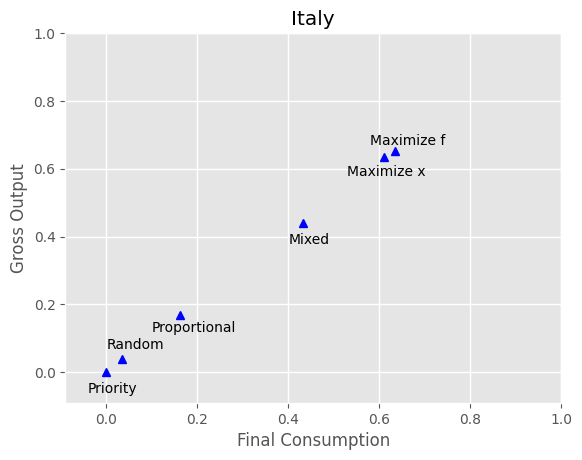

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title("Italy")
plt.grid(visible=None, which='major', axis='both', linestyle='-', linewidth=1)

plt.plot(result_mixed[0], result_mixed[1], 'b^')
plt.plot(result_random[0], result_random[1], 'b^')
plt.plot(result_priority[0], result_priority[1], 'b^')
plt.plot(result_proportional[0], result_proportional[1], 'b^')
plt.plot(Max_consumption[0], Max_consumption[1], 'b^')
plt.plot(Max_output[0], Max_output[1], 'b^')

plt.text(0.4,0.38,'Mixed')
plt.text(0.1,0.12,'Proportional')
plt.text(0.0,0.07,'Random')
plt.text(-0.04,-0.06,'Priority')
plt.text(0.53,0.58, 'Maximize x')
plt.text(0.58,0.67, 'Maximize f')

plt.xlim(-0.09, 1) 
plt.ylim(-0.09,1)

plt.xlabel("Final Consumption")
plt.ylabel("Gross Output")
plt.savefig('plot_Italy.png')
plt.show()